### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
dim(ny)

[1] 54770     9

In [4]:
dim(wash)

[1] 89051     7

In [5]:
dim(chi)

[1] 8630    9

### Question 1


**Your question 1 goes here.**

In [6]:
# Your solution code goes here
### Question 1, most common month, day and hour
library(tidyverse) 
getwd()
#### the following scripts read the 3 set of data (Chicago, NewYork and Washington)
chi <- read_csv("chicago.csv")
chi <- chi %>%  mutate(City = "Chicago")
ny <- read_csv("new_york_city.csv")
ny <- ny %>%  mutate(City = "New_York")
wash <- read_csv("washington.csv")
wash <- wash %>%  mutate(City = "Washington")
### Concat the 3 dataset in one dataset
pd <- bind_rows(chi,ny,wash)
### Create a colum for months, days and hours of "Start Time
pd <- mutate(pd, month = format(`Start Time`,"%B"))
pd <- mutate(pd, day = format(`Start Time`,"%A"))
pd <- mutate(pd, hour = format(`Start Time`,"%H"))
## The most common month, day and hour (Question 1)
pf1 <- pd %>% group_by(month) %>% summarise(nb=n()) %>% arrange(desc(nb))
pf2 <- pd %>% group_by(day) %>% summarise(nb=n()) %>% arrange(desc(nb))
pf3 <- pd %>% group_by(hour) %>% summarise(nb=n()) %>% arrange(desc(nb))


Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


[1] "C:/Users/LMVZ3480/Desktop/Udacity/udacity-git-course/pdsnd_github"

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  `Start Time` = col_datetime(format = ""),
  `End Time` = col_datetime(format = ""),
  `Trip Duration` = col_double(),
  `Start Station` = col_character(),
  `End Station` = col_character(),
  `User Type` = col_character(),
  Gender = col_character(),
  `Birth Year` = col_double()
)
Warning message:
"1 parsing failure.
 row col  expected    actual          file
8630  -- 9 columns 5 columns 'chicago.csv'
"Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  `Start Time` = col_datetime(format = ""),
  `End Time` = col_datetime(format = ""),
  `Trip Duration` = col_double(),
  `Start Station` = col_character(),
  `End Station` = col_character(),
  `User Type` = col_character(),
  Gender = col_character(),
  `Birth Year` = col_double()
)
Warning message:
"2 parsing failures.
  row      col   expected   

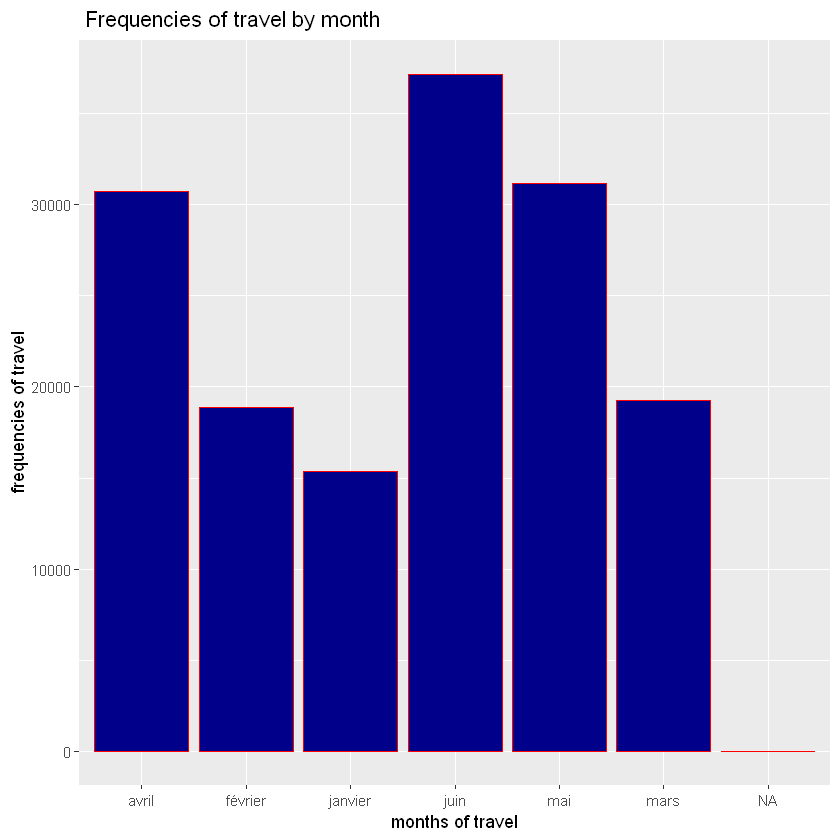

In [7]:
### Bar plot for the frequencies of travel by months
ggplot(pd) + geom_bar(aes(x = month), color= "red", fill="darkblue") +
    ggtitle(" Frequencies of travel by month") + labs(x="months of travel", y= "frequencies of travel")

**Summary of your question 1 results goes here.**

### Question 2

**Your question 2 goes here.**

In [37]:
# Your solution code goes here
## Question 2
### The most common start station
pf4 <- pd %>% group_by(`Start Station`) %>% summarise(nb=n()) %>% arrange(desc(nb))
### The most common end station
pf5 <- pd %>% group_by(`End Station`) %>% summarise(nb=n()) %>% arrange(desc(nb))
### The most common trip
pf6 <- pd %>% group_by(`Start Station`,`End Station`) %>% 
  summarise(nb=n()) %>% arrange(desc(nb))



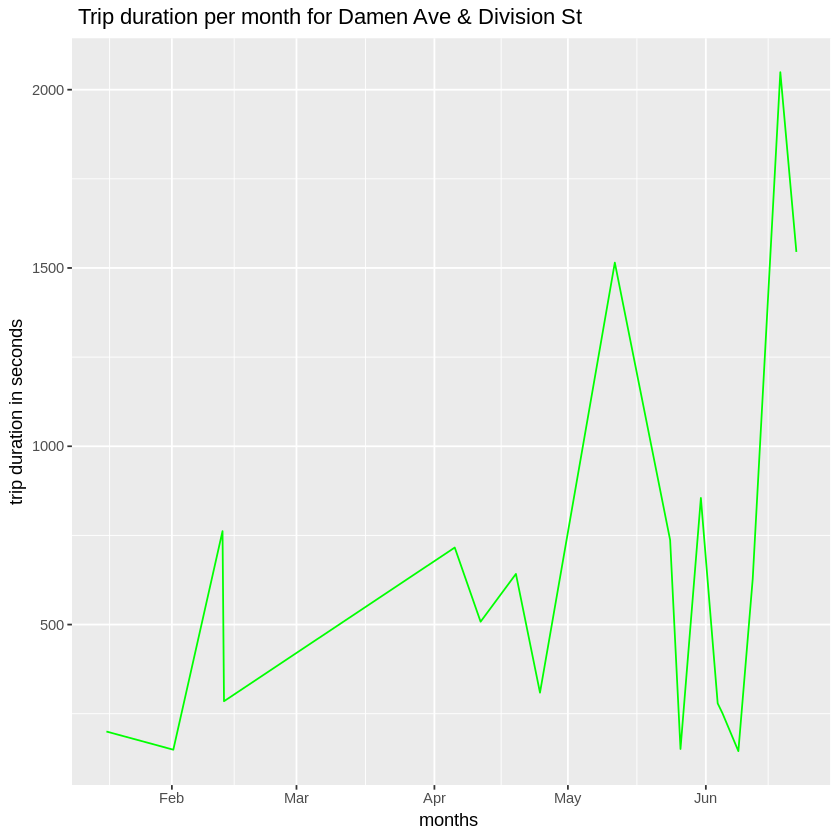

In [40]:
### line plot for trip duration per month for Damen Ave Station
pd %>% filter(`Start Station`=="Damen Ave & Division St") %>% ggplot() + geom_line(aes(x= `Start Time`, y =`Trip Duration`), color = "green") +
   ggtitle(" Trip duration per month for Damen Ave & Division St") + labs(x="months ", y= "trip duration in seconds")



**Summary of your question 2 results goes here.**

### Question 3

**Your question 3 goes here.**

In [46]:
# Your solution code goes here
# Question 3
### Number of each User type
pf7 <- pd %>% group_by(`User Type`) %>% summarise(User_type = n())
### Number of users by gender in New-York
pf8 <- pd %>% group_by(Gender) %>% filter(City=='New_York') %>%  summarise(Nb_Gender = n())
### earliest common year of birth
pf9 <- pd %>% arrange(`Birth Year`)




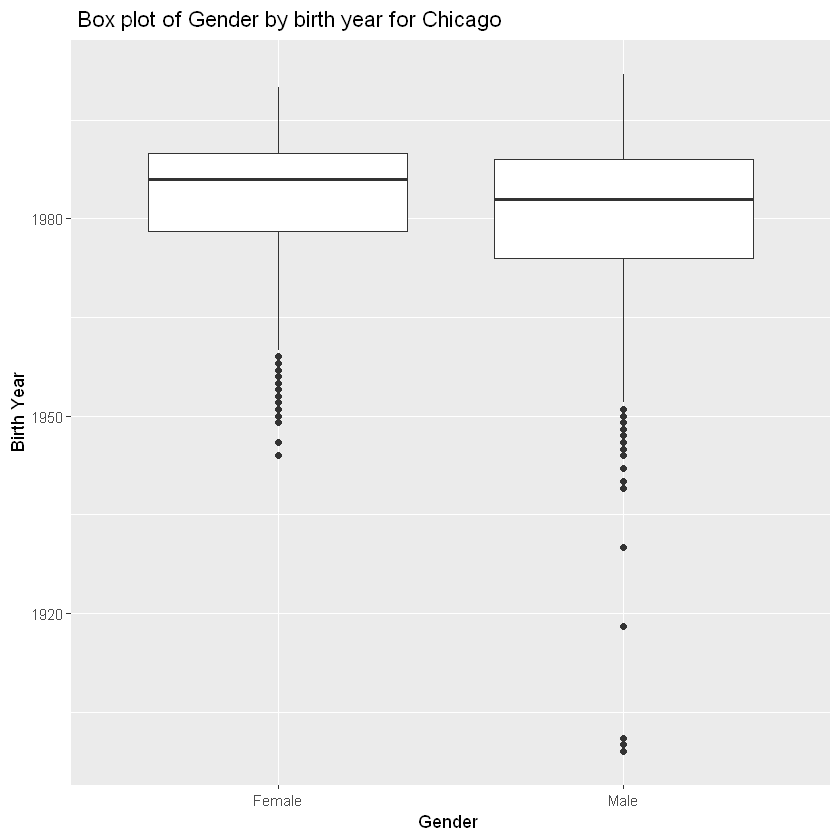

In [8]:
### Boxplot of gender by birth year for Chicago
pd %>% filter(City == "Chicago" & !is.na(Gender)) %>% ggplot() + geom_boxplot(aes(x=Gender, y= `Birth Year`)) + ggtitle(" Box plot of Gender by birth year for Chicago") + labs(x="Gender ", y= "Birth Year")

In [10]:
### Number of users by gender in Chicago
pf10 <- pd %>% group_by(Gender) %>% filter(City=='Chicago') %>%  summarise(Nb_Gender = n())

**Summary of your question 3 results goes here.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')